In [1]:
!pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.9/693.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.0/275.0 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.6/154.6 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━

In [2]:
pip install numpy==1.22.0  # Replace "1.22.0" with a compatible version number


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 46.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.6 which is incompatible.
chex 0.1.81 requires numpy>=1.25.0, but you have numpy 1.22.0 which is incompatible.
librosa 0.10.0.post2 requires numpy!=1.22.0,!=1.22.1,!=1.22.2,>=1.20.3, but you have numpy 1.22.0 which is incompatible.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.11.1 which is incompatible.
ydata-profiling 4.3.1 requires scipy<1.11,>=1.4.1, but you have scipy 1.11.1 which is incompatible.
Note: yo

#### Importing all the Libraries

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from functools import reduce
import os
import seaborn as sns
import folium
import IPython
from PIL import Image
from darts import TimeSeries
import matplotlib.pyplot as plt
from darts.models import ExponentialSmoothing

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

#### To show all the datasets that we are using with their paths

In [4]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        f = os.path.join(dirname, filename)  # Construct the full path to the file
        print(f)  # Print the full path of the file


/kaggle/input/renewable-energy-world-wide-19652022/06 hydro-share-energy.csv
/kaggle/input/renewable-energy-world-wide-19652022/03 modern-renewable-prod.csv
/kaggle/input/renewable-energy-world-wide-19652022/04 share-electricity-renewables.csv
/kaggle/input/renewable-energy-world-wide-19652022/16 biofuel-production.csv
/kaggle/input/renewable-energy-world-wide-19652022/11 share-electricity-wind.csv
/kaggle/input/renewable-energy-world-wide-19652022/15 share-electricity-solar.csv
/kaggle/input/renewable-energy-world-wide-19652022/09 cumulative-installed-wind-energy-capacity-gigawatts.csv
/kaggle/input/renewable-energy-world-wide-19652022/13 installed-solar-PV-capacity.csv
/kaggle/input/renewable-energy-world-wide-19652022/10 wind-share-energy.csv
/kaggle/input/renewable-energy-world-wide-19652022/02 modern-renewable-energy-consumption.csv
/kaggle/input/renewable-energy-world-wide-19652022/01 renewable-share-energy.csv
/kaggle/input/renewable-energy-world-wide-19652022/08 wind-generation

#### Reading all the datasets/csv files individually so that we can merge them later as per our requirement.

In [5]:
df1 = pd.read_csv("/kaggle/input/renewable-energy-world-wide-19652022/06 hydro-share-energy.csv")
df2 = pd.read_csv("/kaggle/input/renewable-energy-world-wide-19652022/03 modern-renewable-prod.csv")
df3 = pd.read_csv("/kaggle/input/renewable-energy-world-wide-19652022/04 share-electricity-renewables.csv")
df4 = pd.read_csv("/kaggle/input/renewable-energy-world-wide-19652022/16 biofuel-production.csv")
df5 = pd.read_csv("/kaggle/input/renewable-energy-world-wide-19652022/11 share-electricity-wind.csv")
df6 = pd.read_csv("/kaggle/input/renewable-energy-world-wide-19652022/15 share-electricity-solar.csv")
df7 = pd.read_csv("/kaggle/input/renewable-energy-world-wide-19652022/09 cumulative-installed-wind-energy-capacity-gigawatts.csv")
df8 = pd.read_csv("/kaggle/input/renewable-energy-world-wide-19652022/13 installed-solar-PV-capacity.csv")
df9 = pd.read_csv("/kaggle/input/renewable-energy-world-wide-19652022/10 wind-share-energy.csv")
df10 = pd.read_csv("/kaggle/input/renewable-energy-world-wide-19652022/02 modern-renewable-energy-consumption.csv")
df11= pd.read_csv("/kaggle/input/renewable-energy-world-wide-19652022/01 renewable-share-energy.csv")
df12 = pd.read_csv("/kaggle/input/renewable-energy-world-wide-19652022/08 wind-generation.csv")
df13 = pd.read_csv("/kaggle/input/renewable-energy-world-wide-19652022/07 share-electricity-hydro.csv")
df14 = pd.read_csv("/kaggle/input/renewable-energy-world-wide-19652022/05 hydropower-consumption.csv")
df15 = pd.read_csv("/kaggle/input/renewable-energy-world-wide-19652022/12 solar-energy-consumption.csv")
df16 = pd.read_csv("/kaggle/input/renewable-energy-world-wide-19652022/14 solar-share-energy.csv")
df17 = pd.read_csv("/kaggle/input/renewable-energy-world-wide-19652022/17 installed-geothermal-capacity.csv")
df18 = pd.read_csv("/kaggle/input/worldeconomy/Income_category_of_Countries.csv")

#### Removing unnecessary columns in all the datasets ie Column 'code'

In [6]:
dataframes_list = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17]
for dataframe in dataframes_list:
    if "Code" in dataframe.columns:
        dataframe.drop("Code", axis=1, inplace=True)
    else:
        print("The 'Code' column does not exist in the dataframe.")
    


##### Here I have constructed a list in which all the dataframes are there which i have merged ON two common columns ie Entity and Year with filling 0 in all the values which have Nan or empty cell.

In [7]:
dataframes_list = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17]
df = reduce(lambda x,y: pd.merge(x,y, on=['Entity', 'Year'], how='outer'), dataframes_list).fillna(0)
print(df.columns)

Index(['Entity', 'Year', 'Hydro (% equivalent primary energy)',
       'Electricity from wind (TWh)_x', 'Electricity from hydro (TWh)_x',
       'Electricity from solar (TWh)_x',
       'Other renewables including bioenergy (TWh)',
       'Renewables (% electricity)', 'Biofuels Production - TWh - Total',
       'Wind (% electricity)', 'Solar (% electricity)', 'Wind Capacity',
       'Solar Capacity', 'Wind (% equivalent primary energy)',
       'Geo Biomass Other - TWh', 'Solar Generation - TWh',
       'Wind Generation - TWh', 'Hydro Generation - TWh',
       'Renewables (% equivalent primary energy)',
       'Electricity from wind (TWh)_y', 'Hydro (% electricity)',
       'Electricity from hydro (TWh)_y', 'Electricity from solar (TWh)_y',
       'Solar (% equivalent primary energy)', 'Geothermal Capacity'],
      dtype='object')


In [8]:
columns_to_drop = ['Electricity from solar (TWh)_y', 'Electricity from hydro (TWh)_y', 'Electricity from wind (TWh)_y']

if all(col in df.columns for col in columns_to_drop):
    df.drop(columns_to_drop, axis=1, inplace=True)
else:
    print("These Columns don't exist in df.")


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8997 entries, 0 to 8996
Data columns (total 22 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Entity                                      8997 non-null   object 
 1   Year                                        8997 non-null   int64  
 2   Hydro (% equivalent primary energy)         8997 non-null   float64
 3   Electricity from wind (TWh)_x               8997 non-null   float64
 4   Electricity from hydro (TWh)_x              8997 non-null   float64
 5   Electricity from solar (TWh)_x              8997 non-null   float64
 6   Other renewables including bioenergy (TWh)  8997 non-null   float64
 7   Renewables (% electricity)                  8997 non-null   float64
 8   Biofuels Production - TWh - Total           8997 non-null   float64
 9   Wind (% electricity)                        8997 non-null   float64
 10  Solar (% ele

In [10]:
df.describe()

,Year,Hydro (% equivalent primary energy),Electricity from wind (TWh)_x,Electricity from hydro (TWh)_x,Electricity from solar (TWh)_x,Other renewables including bioenergy (TWh),Renewables (% electricity),Biofuels Production - TWh - Total,Wind (% electricity),Solar (% electricity),...,Solar Capacity,Wind (% equivalent primary energy),Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,Renewables (% equivalent primary energy),Hydro (% electricity),Solar (% equivalent primary energy),Geothermal Capacity
count,8997.000000,8997.000000,8997.000000,8997.000000,8997.000000,8997.000000,8997.000000,8997.000000,8997.000000,8997.000000,...,8997.000000,8997.000000,8997.000000,8997.000000,8997.000000,8997.000000,8997.000000,8997.000000,8997.000000,8997.000000
mean,2000.006558,5.805308,14.051264,114.544180,5.093739,11.742093,22.989832,6.793814,1.037419,0.443326,...,2.274589,0.266737,8.174756,3.315148,9.094915,92.102214,6.685727,19.706213,0.078465,77.505104
std,15.680165,10.454989,84.875936,357.399416,39.404742,47.419105,29.806114,51.313206,3.926109,1.773236,...,23.969711,1.212177,37.711544,31.142106,66.319393,316.142284,11.449514,28.237139,0.374916,620.264101
min,1965.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1989.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2004.000000,0.537172,0.000000,3.280000,0.000000,0.010000,10.178117,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.506000,1.081630,5.645161,0.000000,0.000000
75%,2013.000000,6.626581,0.040000,28.270000,0.010000,1.424000,35.815777,0.000000,0.053220,0.007597,...,0.000000,0.000305,0.652208,0.000000,0.002000,19.751514,7.878894,27.229160,0.000000,0.000000
max,2022.000000,72.310486,1848.260000,4340.610000,1040.500000,761.930050,100.000015,1114.488300,56.839542,40.000000,...,843.086060,24.614344,762.782650,1032.501200,1861.939800,4345.990000,86.874535,100.000010,5.999280,14075.000000


##### So basically in the data set we have been given the values from year 1965 to 2022 with following countries data.

In [11]:
print('We have been given the datas from', min(df['Year']),'to', max(df['Year']),'with \n ')
print(df['Entity'].unique())

We have been given the datas from 1965 to 2022 with 
 
['Africa' 'Africa (BP)' 'Algeria' 'Argentina' 'Asia' 'Asia Pacific (BP)'
 'Australia' 'Austria' 'Azerbaijan' 'Bangladesh' 'Belarus' 'Belgium'
 'Brazil' 'Bulgaria' 'CIS (BP)' 'Canada' 'Central America (BP)' 'Chile'
 'China' 'Colombia' 'Croatia' 'Cyprus' 'Czechia' 'Denmark'
 'Eastern Africa (BP)' 'Ecuador' 'Egypt' 'Estonia' 'Europe' 'Europe (BP)'
 'European Union (27)' 'Finland' 'France' 'Germany' 'Greece'
 'High-income countries' 'Hong Kong' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Japan' 'Kazakhstan'
 'Kuwait' 'Latvia' 'Lithuania' 'Lower-middle-income countries'
 'Luxembourg' 'Malaysia' 'Mexico' 'Middle Africa (BP)' 'Middle East (BP)'
 'Morocco' 'Netherlands' 'New Zealand' 'Non-OECD (BP)' 'North America'
 'North America (BP)' 'North Macedonia' 'Norway' 'OECD (BP)' 'Oceania'
 'Oman' 'Pakistan' 'Peru' 'Philippines' 'Poland' 'Portugal' 'Qatar'
 'Romania' 'Russia' 'Saudi Arabia' 'Singapore' 'Sl

##### Checking the no. of Null Values in each numerical columns. SInce alreday replaced Nan values with Zero so no null values now.

In [12]:
df.isna().sum()

Entity                                        0
Year                                          0
Hydro (% equivalent primary energy)           0
Electricity from wind (TWh)_x                 0
Electricity from hydro (TWh)_x                0
Electricity from solar (TWh)_x                0
Other renewables including bioenergy (TWh)    0
Renewables (% electricity)                    0
Biofuels Production - TWh - Total             0
Wind (% electricity)                          0
Solar (% electricity)                         0
Wind Capacity                                 0
Solar Capacity                                0
Wind (% equivalent primary energy)            0
Geo Biomass Other - TWh                       0
Solar Generation - TWh                        0
Wind Generation - TWh                         0
Hydro Generation - TWh                        0
Renewables (% equivalent primary energy)      0
Hydro (% electricity)                         0
Solar (% equivalent primary energy)     

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8997 entries, 0 to 8996
Data columns (total 22 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Entity                                      8997 non-null   object 
 1   Year                                        8997 non-null   int64  
 2   Hydro (% equivalent primary energy)         8997 non-null   float64
 3   Electricity from wind (TWh)_x               8997 non-null   float64
 4   Electricity from hydro (TWh)_x              8997 non-null   float64
 5   Electricity from solar (TWh)_x              8997 non-null   float64
 6   Other renewables including bioenergy (TWh)  8997 non-null   float64
 7   Renewables (% electricity)                  8997 non-null   float64
 8   Biofuels Production - TWh - Total           8997 non-null   float64
 9   Wind (% electricity)                        8997 non-null   float64
 10  Solar (% ele

## EDA

### For Country India

In [14]:
from_year = 1965
till_year = 2022
India_df = df[(df['Entity']== 'India')& (df['Year']>= from_year) & (df['Year']<= till_year)]
India_df

,Entity,Year,Hydro (% equivalent primary energy),Electricity from wind (TWh)_x,Electricity from hydro (TWh)_x,Electricity from solar (TWh)_x,Other renewables including bioenergy (TWh),Renewables (% electricity),Biofuels Production - TWh - Total,Wind (% electricity),...,Solar Capacity,Wind (% equivalent primary energy),Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,Renewables (% equivalent primary energy),Hydro (% electricity),Solar (% equivalent primary energy),Geothermal Capacity
2131,India,1965,9.149455,0.000000,19.166937,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,19.166937,9.149455,0.000000,0.000000,0.0
2132,India,1966,9.270712,0.000000,20.015463,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,20.015463,9.270712,0.000000,0.000000,0.0
2133,India,1967,10.058605,0.000000,22.397520,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,22.397520,10.058605,0.000000,0.000000,0.0
2134,India,1968,10.857532,0.000000,25.849072,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,25.849072,10.857532,0.000000,0.000000,0.0
2135,India,1969,10.873967,0.000000,28.699583,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,28.699583,10.873967,0.000000,0.000000,0.0
2136,India,1970,11.784120,0.000000,30.436407,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,30.436407,11.784120,0.000000,0.000000,0.0
2137,India,1971,12.426771,0.000000,33.384148,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,33.384148,12.426771,0.000000,0.000000,0.0
2138,India,1972,11.463117,0.000000,32.403040,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,32.403040,11.463117,0.000000,0.000000,0.0
2139,India,1973,11.957463,0.000000,34.506676,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,34.506676,11.957463,0.000000,0.000000,0.0
2140,India,1974,10.860853,0.000000,33.202953,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,33.202953,10.860853,0.000000,0.000000,0.0


In [15]:
India_df.head(6)

,Entity,Year,Hydro (% equivalent primary energy),Electricity from wind (TWh)_x,Electricity from hydro (TWh)_x,Electricity from solar (TWh)_x,Other renewables including bioenergy (TWh),Renewables (% electricity),Biofuels Production - TWh - Total,Wind (% electricity),...,Solar Capacity,Wind (% equivalent primary energy),Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,Renewables (% equivalent primary energy),Hydro (% electricity),Solar (% equivalent primary energy),Geothermal Capacity
2131,India,1965,9.149455,0.0,19.166937,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,19.166937,9.149455,0.0,0.0,0.0
2132,India,1966,9.270712,0.0,20.015463,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,20.015463,9.270712,0.0,0.0,0.0
2133,India,1967,10.058605,0.0,22.397520,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,22.397520,10.058605,0.0,0.0,0.0
2134,India,1968,10.857532,0.0,25.849072,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,25.849072,10.857532,0.0,0.0,0.0
2135,India,1969,10.873967,0.0,28.699583,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,28.699583,10.873967,0.0,0.0,0.0
2136,India,1970,11.784120,0.0,30.436407,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,30.436407,11.784120,0.0,0.0,0.0


#### Now I want to see the graphs between '% ofelectricity coming from a particular source' over the years for India

In [16]:
electricity_percent = ['Renewables (% electricity)','Solar (% electricity)','Wind (% electricity)', 'Hydro (% electricity)']

def plot_timeseries(df):    
    fig,axes = plt.subplots(2, 2, figsize=(18, 10))

    sns.lineplot(ax=axes[0, 0], data=India_df, x="Year", y=electricity_percent[0]).set(title = 'Percentage of Electricity Obtained from Renewable source of Energy')
    plt.close()
    sns.lineplot(ax=axes[0, 1], data=India_df, x="Year", y=electricity_percent[1]).set(title = 'Percentage of Electricity Obtained from Solar Energy')
    plt.close()
    sns.lineplot(ax=axes[1, 0], data=India_df, x="Year", y=electricity_percent[2]).set(title = 'Percentage of Electricity Obtained from Wind Energy')
    plt.close()
    sns.lineplot(ax=axes[1, 1], data=India_df, x="Year", y=electricity_percent[3]).set(title = 'Percentage of Electricity Obtained from Hydro Energy')
    plt.close()
    
    return fig

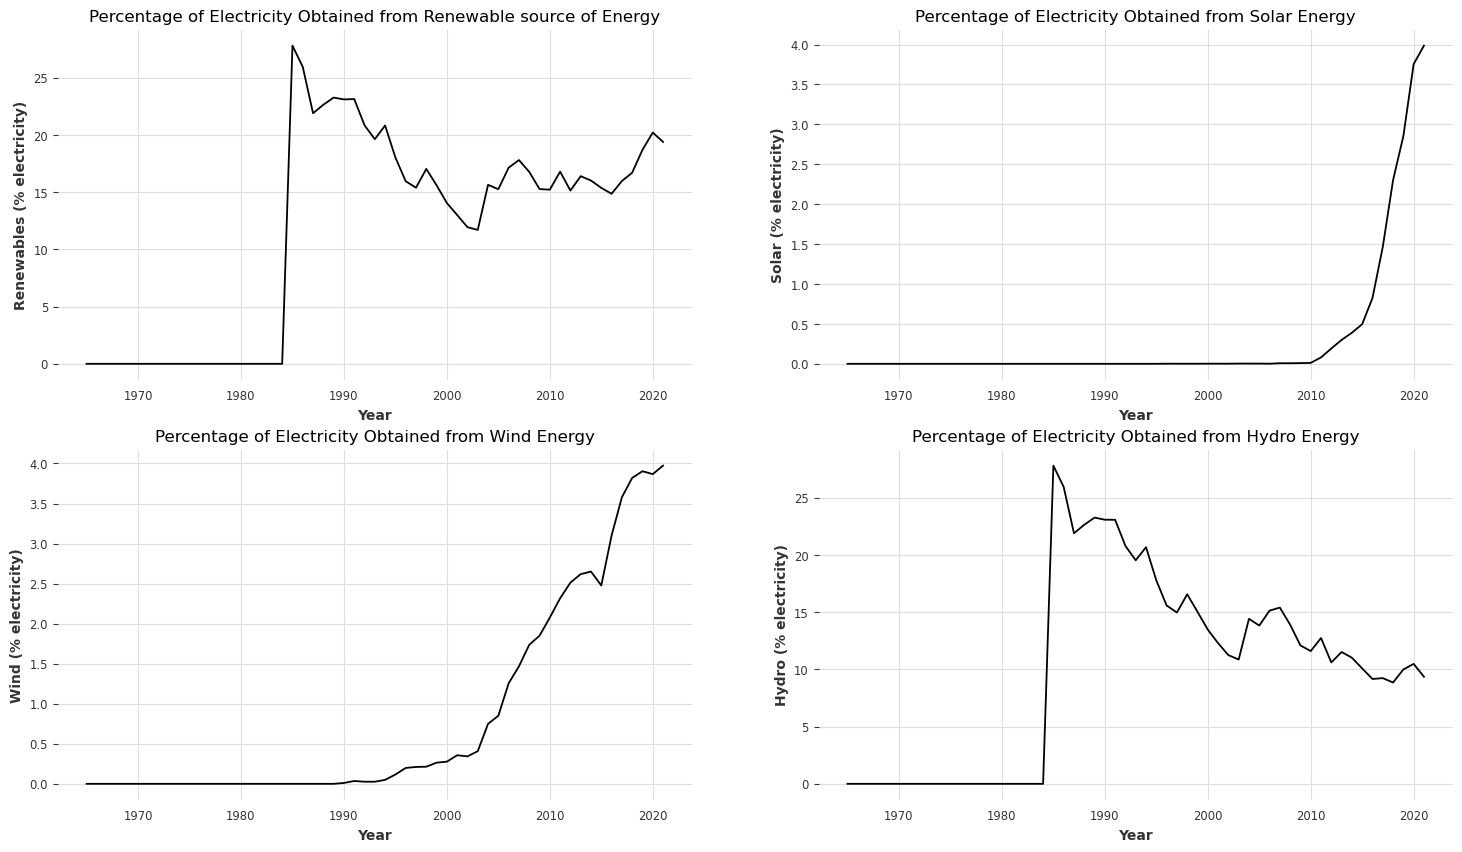

In [17]:
plot_timeseries(India_df)

##### It shows India's Electricity generation is mainly from non-renewable sources like fossil fuels, coal etc.

##### As renewable sources constitutes only 20-25% of total electricity in India.

### For the World

In [18]:
subs = 'countries'
countries_list = list(df['Entity'].unique()) 
# using list comprehension
# to get string with substring
economies = [i for i in countries_list if subs in i]
print(economies)
df_economy = df[df['Entity'].isin(economies)]
df_economy = df_economy[df_economy['Year']> 1990]

['High-income countries', 'Lower-middle-income countries', 'Upper-middle-income countries', 'Low-income countries']


In [19]:
df_economy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 1929 to 7393
Data columns (total 22 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Entity                                      115 non-null    object 
 1   Year                                        115 non-null    int64  
 2   Hydro (% equivalent primary energy)         115 non-null    float64
 3   Electricity from wind (TWh)_x               115 non-null    float64
 4   Electricity from hydro (TWh)_x              115 non-null    float64
 5   Electricity from solar (TWh)_x              115 non-null    float64
 6   Other renewables including bioenergy (TWh)  115 non-null    float64
 7   Renewables (% electricity)                  115 non-null    float64
 8   Biofuels Production - TWh - Total           115 non-null    float64
 9   Wind (% electricity)                        115 non-null    float64
 10  Solar (% e

In [20]:
electricity_percent = ['Renewables (% electricity)','Solar (% electricity)','Wind (% electricity)', 'Hydro (% electricity)']

def plot_timeseries(df):    
    fig,axes = plt.subplots(2, 2, figsize=(18, 10))

    sns.lineplot(ax=axes[0, 0], data=df, x="Year", y=electricity_percent[0], hue="Entity").set(title = 'Percentage of Electricity Obtained from Renewable source of Energy')
    plt.close()
    sns.lineplot(ax=axes[0, 1], data=df, x="Year", y=electricity_percent[1], hue="Entity").set(title = 'Percentage of Electricity Obtained from Solar Energy')
    plt.close()
    sns.lineplot(ax=axes[1, 0], data=df, x="Year", y=electricity_percent[2], hue="Entity").set(title = 'Percentage of Electricity Obtained from Wind Energy')
    plt.close()
    sns.lineplot(ax=axes[1, 1], data=df, x="Year", y=electricity_percent[3], hue="Entity").set(title = 'Percentage of Electricity Obtained from Hydro Energy')
    plt.close()
    
    return fig

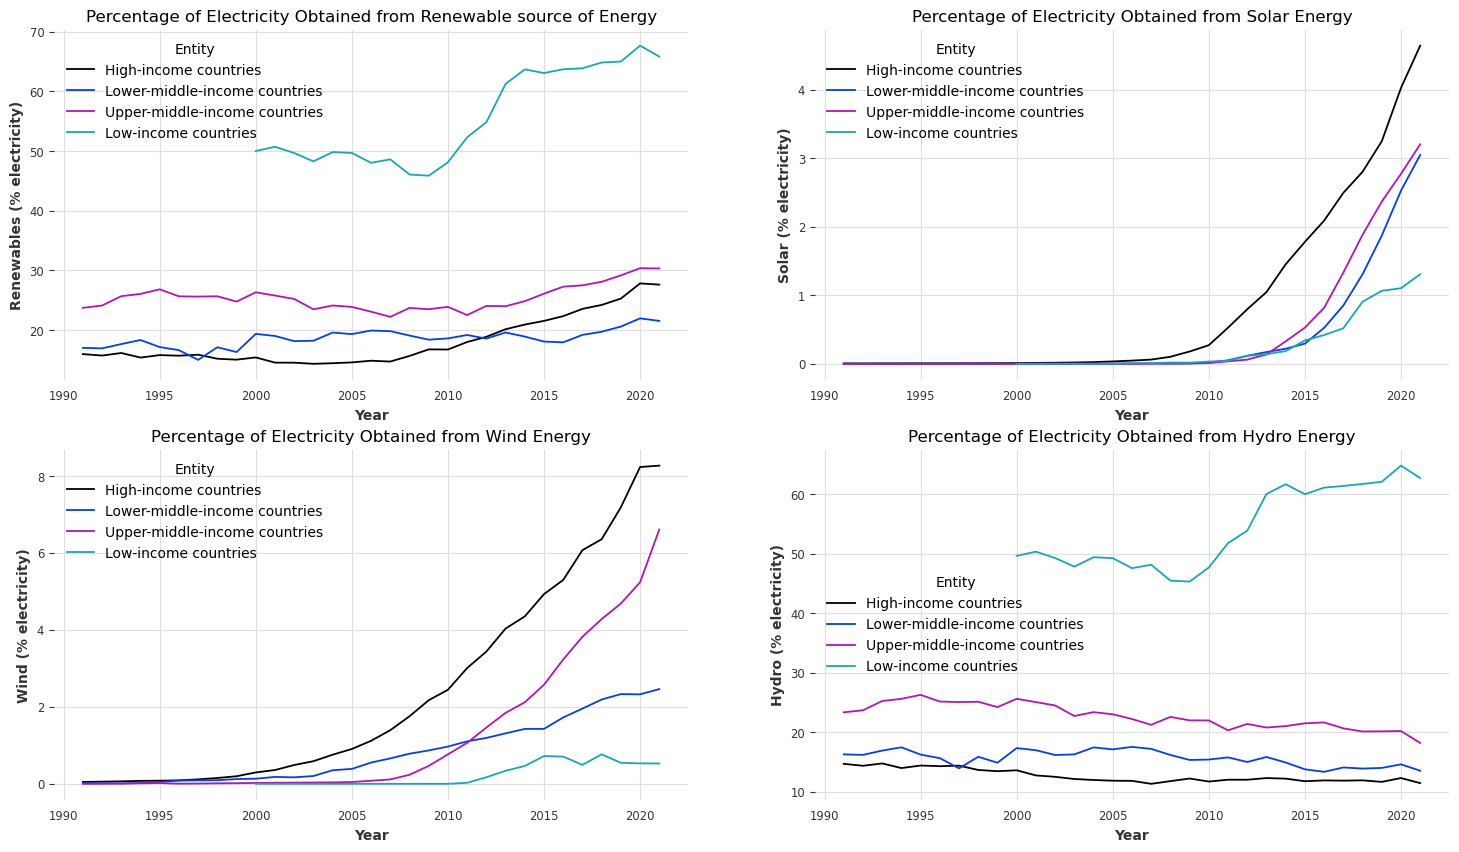

In [21]:
plot_timeseries(df_economy)

## World Region Statistics

In [22]:
macroareas = ['Africa (Ember)', 'Asia (Ember)', 'Europe (Ember)','Latin America and Caribbean (Ember)', 'North America (Ember)', 'Oceania (Ember)']


df_macroareas = df[df['Entity'].isin(macroareas)]
df_macroareas = df_macroareas[df_macroareas['Year']> 1990]

In [23]:
df_macroareas['Entity'] = df_macroareas['Entity'].map(lambda x: x.lstrip('+-').rstrip("(Ember)"))

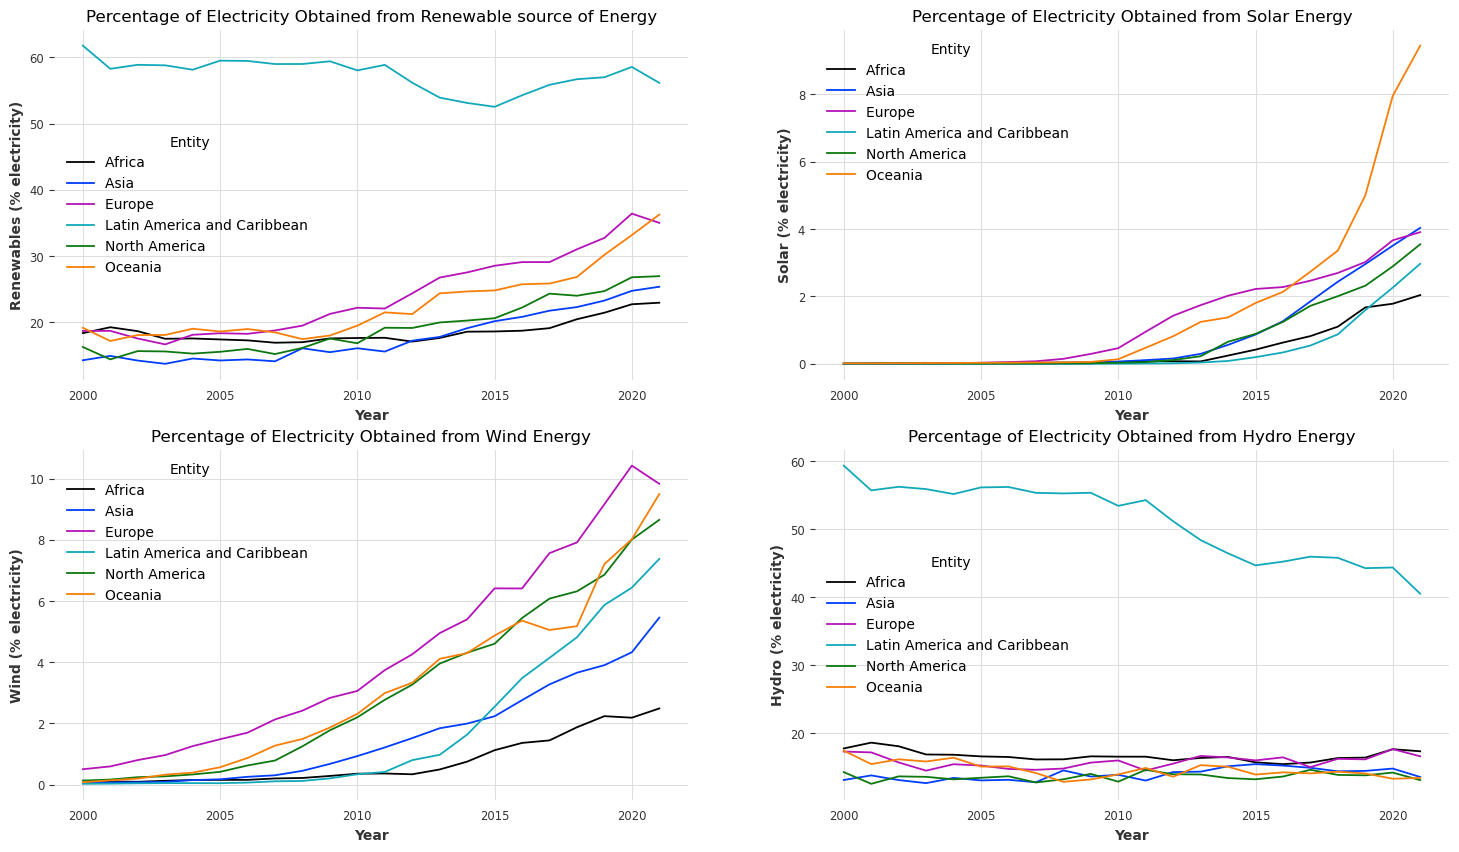

In [24]:
fig2 = plot_timeseries(df_macroareas)
fig2

* ##### Oceania is performing the best in terms of getting electricity generated from Solar Energy.Reason can be that, Oceania is generally hot and humid year-round. While Africs is performing worst , reason can be because of getting highest precipitation thus low solar energy.

* ##### Europe is performing the best in case of Wind energy. Since the 1980s, wind energy has become increasingly important in Europe's power production. From the first wind farms being built in the late 20th century, wind power now provided 17 per cent of Europe's total electricity consumption in 2022. Africa again at bottom.

* ##### Almost half of Latin America and the Caribbean (LAC)'s electricity comes from hydropower, Reason can be its unique geography and meteorology explain the widespread use of hydropower. Its four largest drainage systems cover about two-thirds of the continent. Most river basins are located east of the Andes and flow towards the Atlantic Ocean. It also has numerous glaciers that feed hydro plants.

* ##### Africa being less active in Renewable source of energy can be because its majority around 60% countries falls in low income countries. Out of 27 low income countries of the world, 23 lies in Africa only. so due to low income Renewable energy is far back for Africa.
 

#### Now Analysing  on the basis of different Income catagories countries and their contribution, utilization of renewable source of Energy

In [25]:
df18.head(5)

,S_no,Country_name,Income_group
0,1,Afghanistan,Low income
1,2,Albania,Upper middle income
2,3,Algeria,Lower middle income
3,4,American Samoa,Upper middle income
4,5,Andorra,High income


Merging the Csv files one containing income wise category and other being Df

In [26]:
df_merged = pd.merge(df,df18, left_on = "Entity",right_on = "Country_name" )

In [27]:
df_merged.head(2)

,Entity,Year,Hydro (% equivalent primary energy),Electricity from wind (TWh)_x,Electricity from hydro (TWh)_x,Electricity from solar (TWh)_x,Other renewables including bioenergy (TWh),Renewables (% electricity),Biofuels Production - TWh - Total,Wind (% electricity),...,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,Renewables (% equivalent primary energy),Hydro (% electricity),Solar (% equivalent primary energy),Geothermal Capacity,S_no,Country_name,Income_group
0,Algeria,1965,4.763068,0.0,0.400,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.400,4.763068,0.0,0.0,0.0,3,Algeria,Lower middle income
1,Algeria,1966,3.518747,0.0,0.355,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.355,3.518747,0.0,0.0,0.0,3,Algeria,Lower middle income


##### Four Basic classification of countries based on Income by IBM 2015 data

In [28]:
print(df_merged['Income_group'].unique())

['Lower middle income' 'High income' 'Upper middle income' 'Low income']


#### For High Income Countries

In [29]:
Energy = ["Solar Energy","Wind Energy","Hydro Energy"]
Countries = ["High Income Countries", "Upper Middle Income Countries","Lower Middle Income Countries", "Low Income Countries"]


high_income_counties = df_merged[df_merged['Income_group'] == 'High income']
solargenration1 = high_income_counties['Solar Generation - TWh'].sum()
windgenration1 = high_income_counties['Wind Generation - TWh'].sum()
hydrogenration1 = high_income_counties['Hydro Generation - TWh'].sum()

print(f"Total {Energy[0]} Generation by {Countries[0]} is {solargenration1}.")
print(f"Total {Energy[1]} Generation by {Countries[0]} is {windgenration1}.")
print(f"Total {Energy[2]} Generation by {Countries[0]} is {hydrogenration1}.")

Total Solar Energy Generation by High Income Countries is 2728.924323882.
Total Wind Energy Generation by High Income Countries is 8127.856022836.
Total Hydro Energy Generation by High Income Countries is 65436.711785201005.


####  For Upper Middle Income Countries

In [30]:
uppermid_income_counties = df_merged[df_merged['Income_group'] == 'Upper middle income']
solargenration2 = uppermid_income_counties['Solar Generation - TWh'].sum()
windgenration2 = uppermid_income_counties['Wind Generation - TWh'].sum()
hydrogenration2 = uppermid_income_counties['Hydro Generation - TWh'].sum()

print(f"Total {Energy[0]} Generation by {Countries[1]} is {solargenration2}.")
print(f"Total {Energy[1]} Generation by {Countries[1]} is {windgenration2}.")
print(f"Total {Energy[2]} Generation by {Countries[1]} is {hydrogenration2}.")


Total Solar Energy Generation by Upper Middle Income Countries is 1478.2798458299999.
Total Wind Energy Generation by Upper Middle Income Countries is 3958.849530913.
Total Hydro Energy Generation by Upper Middle Income Countries is 40493.836617254.


#### For Lower Middle Income Countries

In [31]:
lowmid_income_counties = df_merged[df_merged['Income_group'] == 'Lower middle income']
solargenration3 = lowmid_income_counties['Solar Generation - TWh'].sum()
windgenration3 = lowmid_income_counties['Wind Generation - TWh'].sum()
hydrogenration3 = lowmid_income_counties['Hydro Generation - TWh'].sum()

print(f"Total {Energy[0]} Generation by {Countries[2]} is {int(solargenration3)}.")
print(f"Total {Energy[1]} Generation by {Countries[2]} is {int(windgenration3)}.")
print(f"Total {Energy[2]} Generation by {Countries[2]} is {int(hydrogenration3)}.")

Total Solar Energy Generation by Lower Middle Income Countries is 352.
Total Wind Energy Generation by Lower Middle Income Countries is 675.
Total Hydro Energy Generation by Lower Middle Income Countries is 7745.


#### For Low Income Countries

In [32]:
low_income_counties = df_merged[df_merged['Income_group'] == 'Low income']
solargenration4 = low_income_counties['Solar Generation - TWh'].sum()
windgenration4 = low_income_counties['Wind Generation - TWh'].sum()
hydrogenration4 = low_income_counties['Hydro Generation - TWh'].sum()

print(f"Total {Energy[0]} Generation by {Countries[3]} is {int(solargenration4)}.")
print(f"Total {Energy[1]} Generation by {Countries[3]} is {int(windgenration4)}.")
print(f"Total {Energy[2]} Generation by {Countries[3]} is {int(hydrogenration4)}.")

Total Solar Energy Generation by Low Income Countries is 0.
Total Wind Energy Generation by Low Income Countries is 0.
Total Hydro Energy Generation by Low Income Countries is 0.


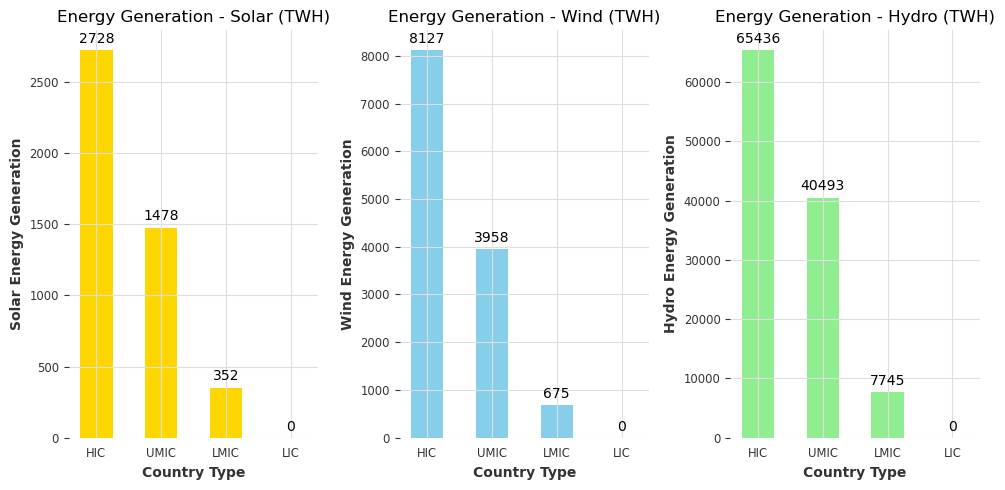

In [33]:
Country_type = ["HIC", "UMIC","LMIC", "LIC"]
Solar_energy_gen = [int(solargenration1),int(solargenration2),int(solargenration3),int(solargenration4)]
Wind_energy_gen = [int(windgenration1),int(windgenration2),int(windgenration3), int(windgenration4)]
Hydro_energy_gen = [int(hydrogenration1),int(hydrogenration2),int(hydrogenration3),int(hydrogenration4)]
solar_color = 'gold'
wind_color = 'skyblue'
hydro_color = 'lightgreen'

fig, axes = plt.subplots(1, 3, figsize=(10, 5))

axes[0].set_title("Energy Generation - Solar (TWH)")
bars_solar=axes[0].bar(Country_type, Solar_energy_gen, width = 0.5, color = solar_color)
axes[0].set_xlabel("Country Type")
axes[0].set_ylabel("Solar Energy Generation")

axes[1].set_title("Energy Generation - Wind (TWH)")
bars_wind = axes[1].bar(Country_type, Wind_energy_gen, width = 0.5, color = wind_color)
axes[1].set_xlabel("Country Type")
axes[1].set_ylabel("Wind Energy Generation")

axes[2].set_title("Energy Generation - Hydro (TWH)")
bars_hydro = axes[2].bar(Country_type, Hydro_energy_gen, width = 0.5, color = hydro_color)
axes[2].set_xlabel("Country Type")
axes[2].set_ylabel("Hydro Energy Generation")

# For giving the Auto lebal effect:
def autolabel(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the autolabel function for each set of bars
autolabel(axes[0], bars_solar)
autolabel(axes[1], bars_wind)
autolabel(axes[2], bars_hydro)

plt.tight_layout()
plt.show()

##### Clearly The renewable source of Energy is genertaed mainly in High income countries followed by Upper middle income , lower middle income countries.

##### Low income countries are nearly not aware of the renewable source of energy.